## Problem Statement :
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
#### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

**About the data:
Let’s consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:**

* **Sales** -- Unit sales (in thousands) at each location

* **Competitor Price** -- Price charged by competitor at each location

* **Income** -- Community income level (in thousands of dollars)

* **Advertising** -- Local advertising budget for company at each location (in thousands of dollars)

* **Population** -- Population size in region (in thousands)

* **Price** -- Price company charges for car seats at each site

* **Shelf Location at stores** -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

* **Age** -- Average age of the local population

* **Education** -- Education level at each location

* **Urban** -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* **US** -- A factor with levels No and Yes to indicate whether the store is in the US or not

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from collections import Counter
from sklearn.tree import  DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [2]:
company_data = pd.read_csv('/content/Company_Data.csv')
company_data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

## 3. Data Exploration

In [3]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company_data.shape

(400, 11)

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

### Feature Engineering

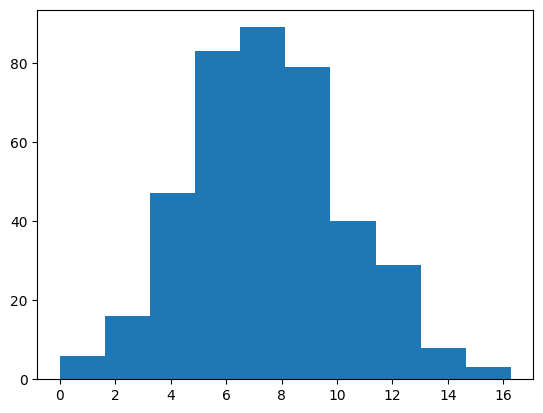

In [7]:
plt.hist('Sales',data= company_data)
plt.show()

#### As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales

#### For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [8]:
company_data1 = company_data.copy()
company_data1['Sales_cat'] = pd.cut(x = company_data1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
company_data1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [9]:
company_data1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [10]:
company_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [11]:
categorical_features = company_data1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [12]:
numerical_features = company_data1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

## 4. Exploratory Data Analysis

 ### Univariate plots

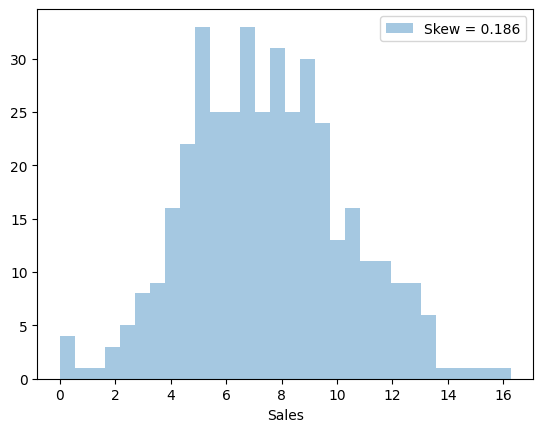

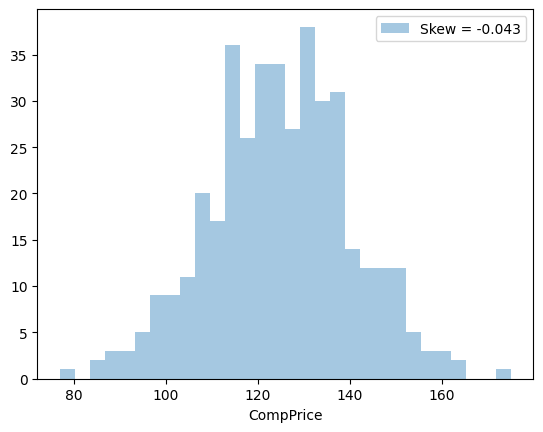

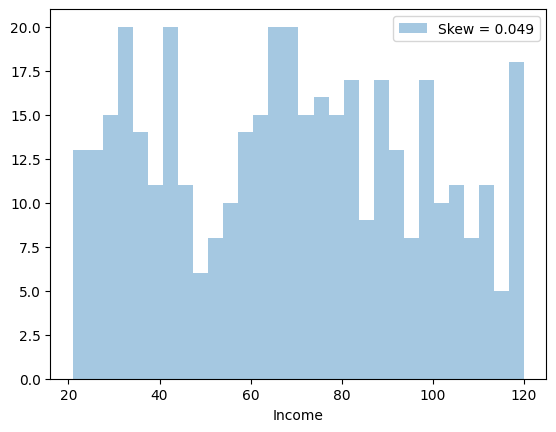

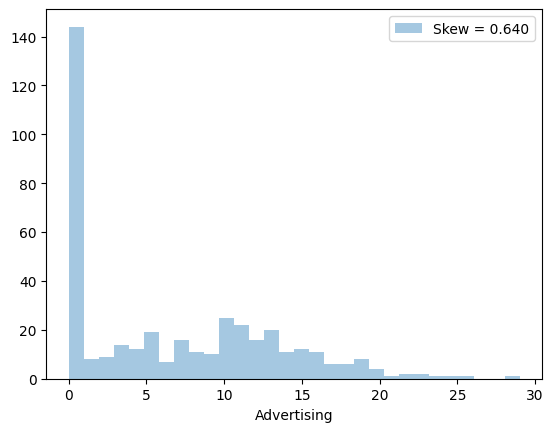

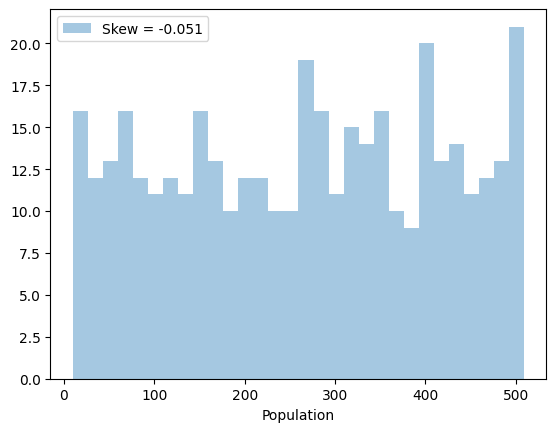

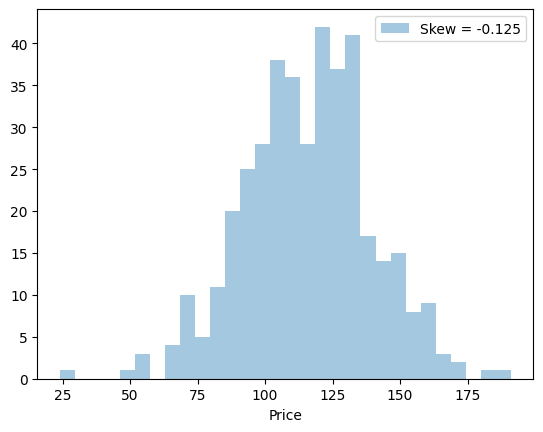

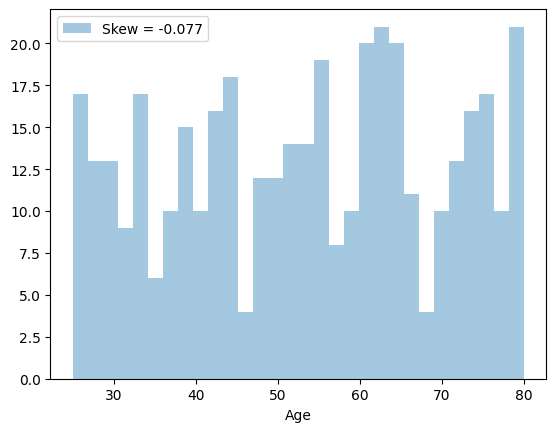

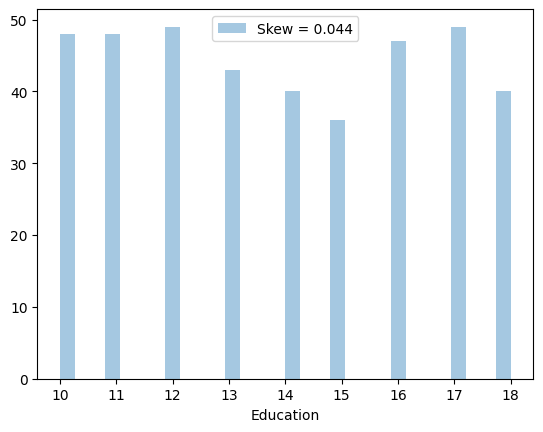

In [13]:
numerical_features = [feature for feature in company_data.columns if company_data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = company_data[feat].skew()
    sns.distplot(company_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

#### Observation
* None of the features is normally distributed.

### Outliers

In [14]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

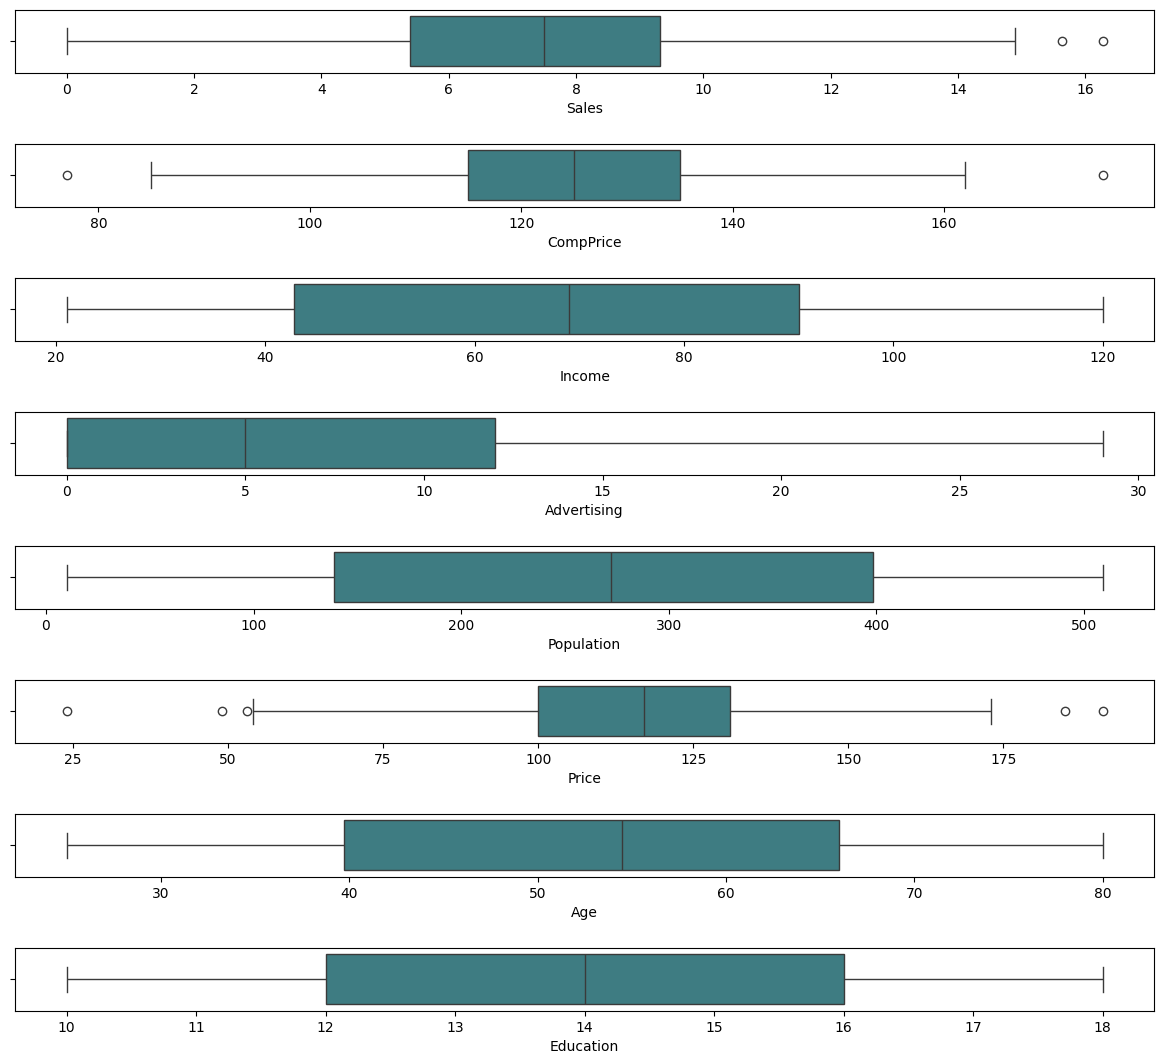

In [15]:
outliers = company_data.copy()
fig, axes = plt.subplots(8,1,figsize=(12,11),sharex=False,sharey=False)
sns.boxplot(x='Sales', data= outliers,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data= outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data= outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data= outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data= outliers,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data= outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data= outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data= outliers,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

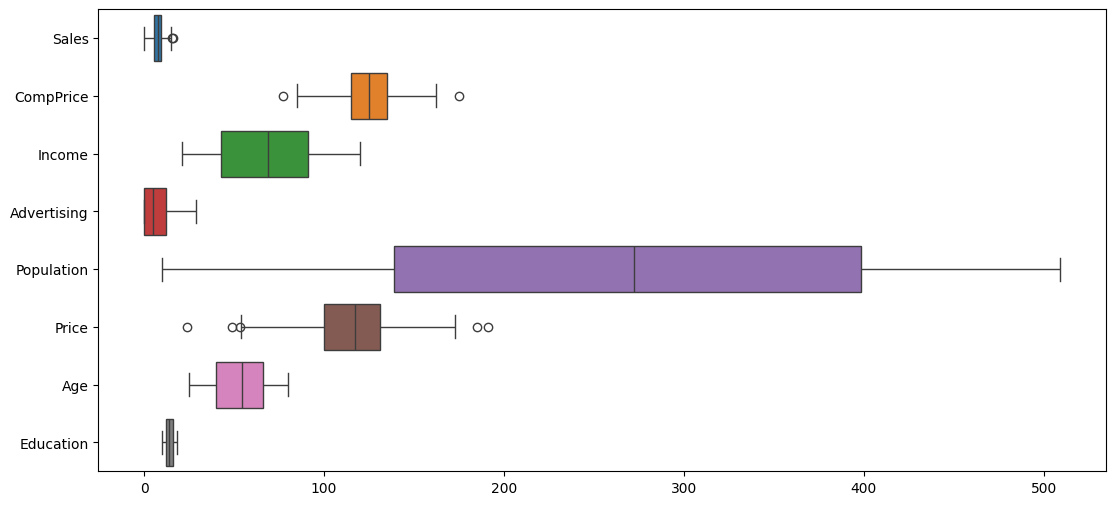

In [16]:
plt.figure(figsize=(13,6))
sns.boxplot(data=company_data[numerical_features], orient="h")
plt.show()

#### Observation:
* Population has a mean that is much superior to the other constituents as we already saw in the previous section.

### Multivariate Analysis
* Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

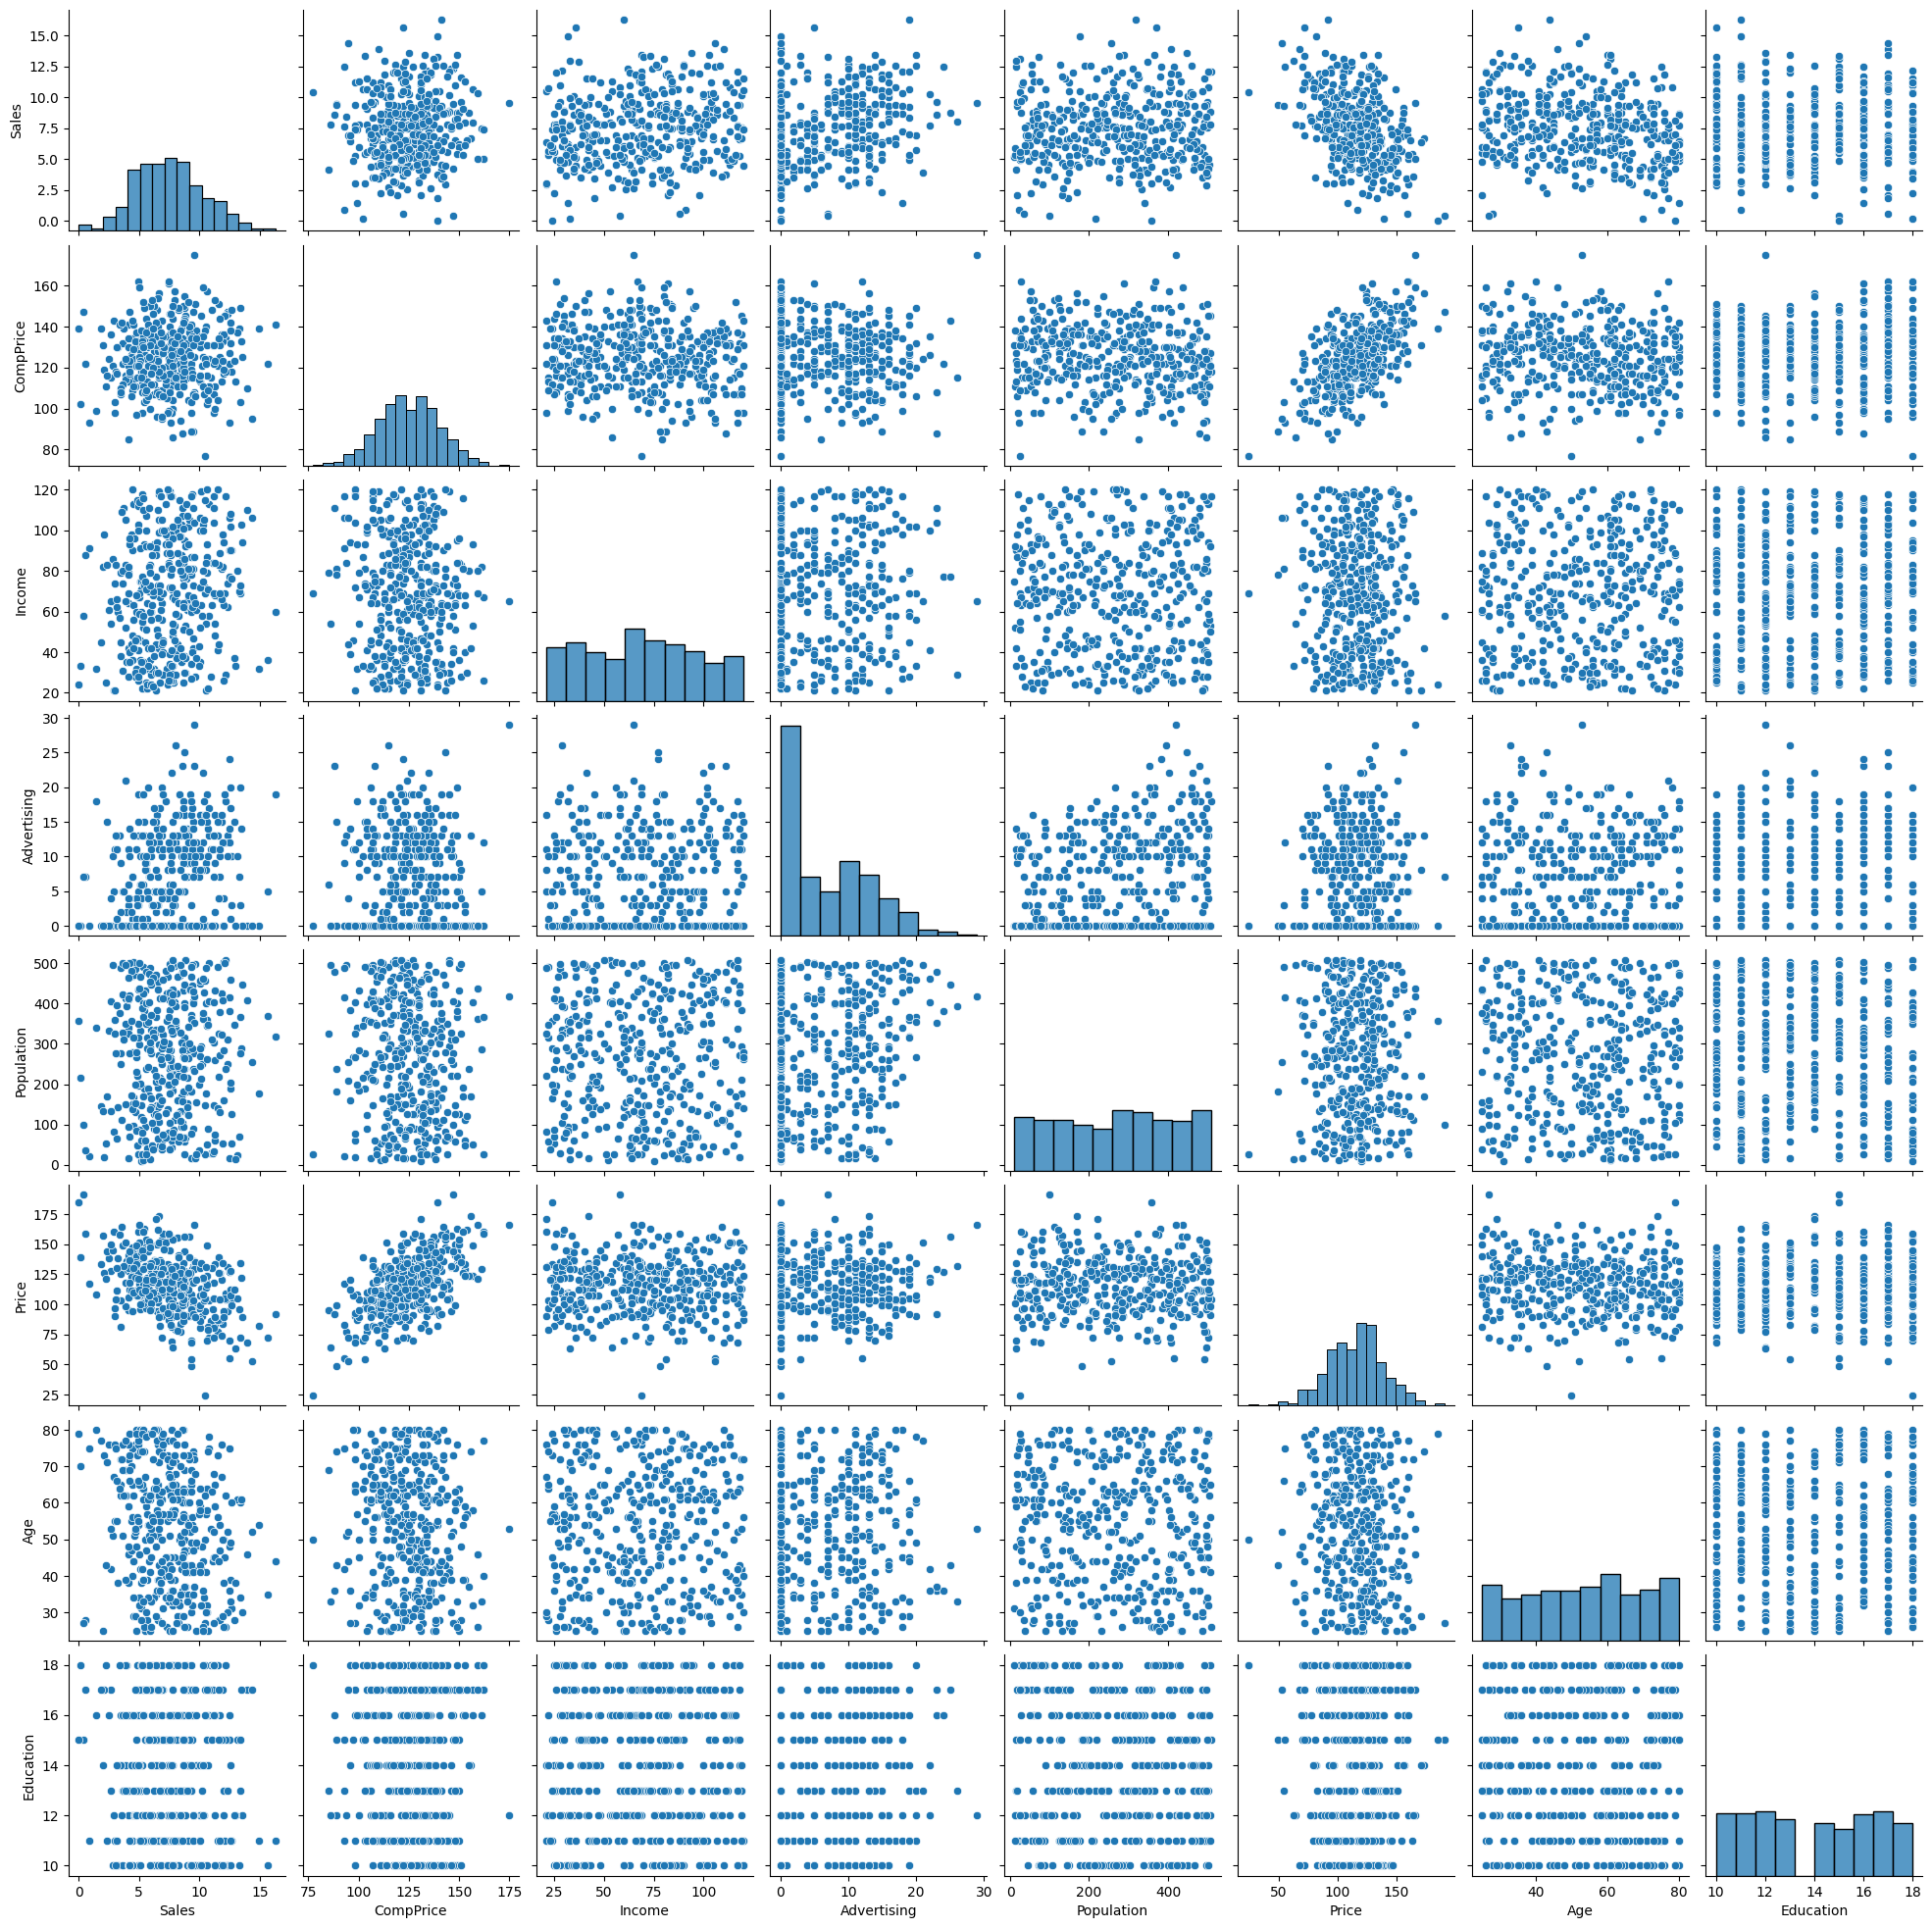

In [17]:
sns.pairplot(company_data, palette='coolwarm')
plt.show()

#### Having a look at the correlation matrix

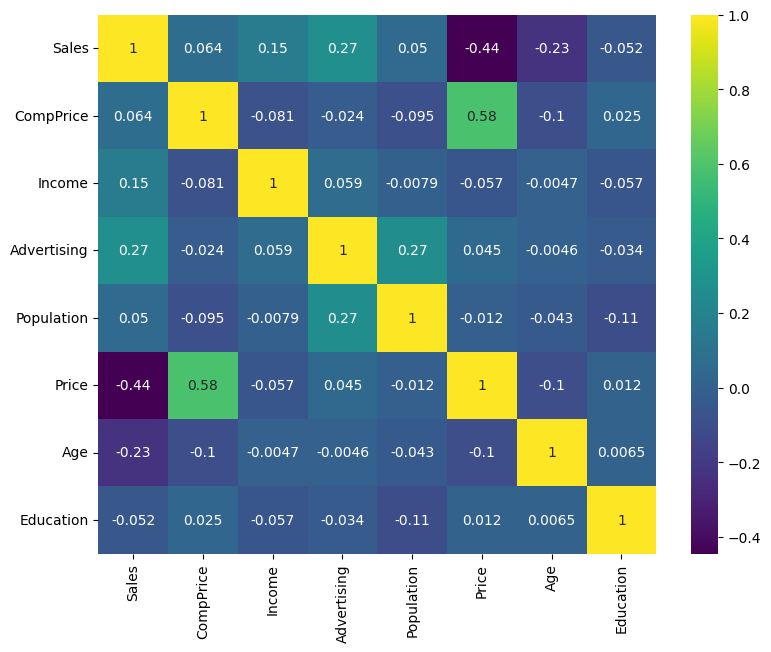

In [18]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(company_data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


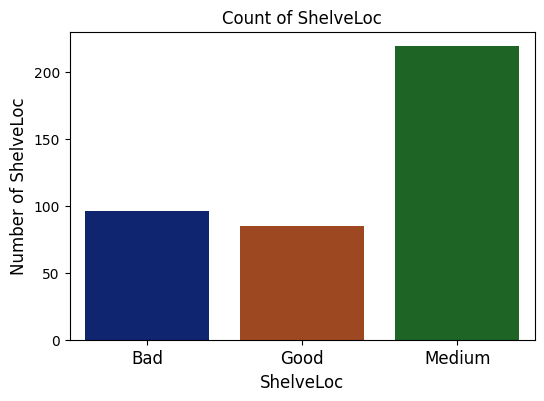

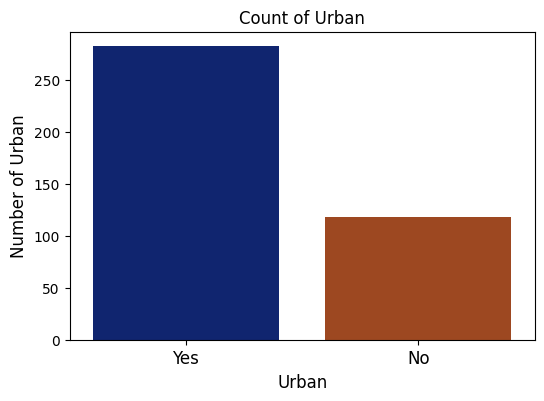

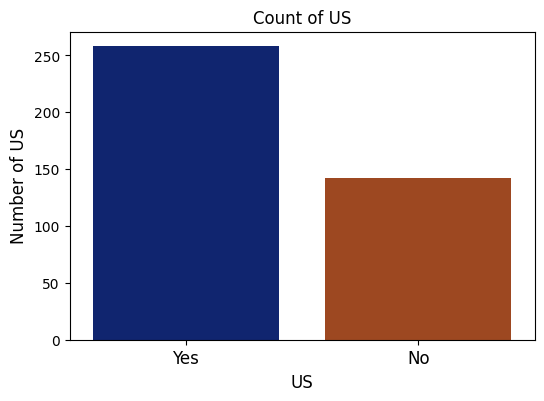

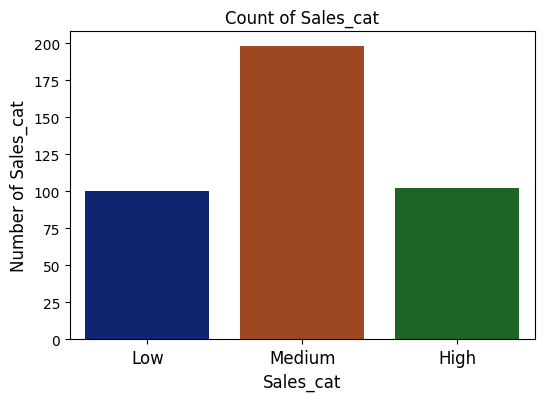

In [19]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(6,4))
    unique = company_data1[column].value_counts(ascending=True);
    plt.title("Count of "+ column)
    sns.countplot(data= company_data1, x=column, palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
plt.show()

#### Let's plot pair plot to visualise the attributes all at once

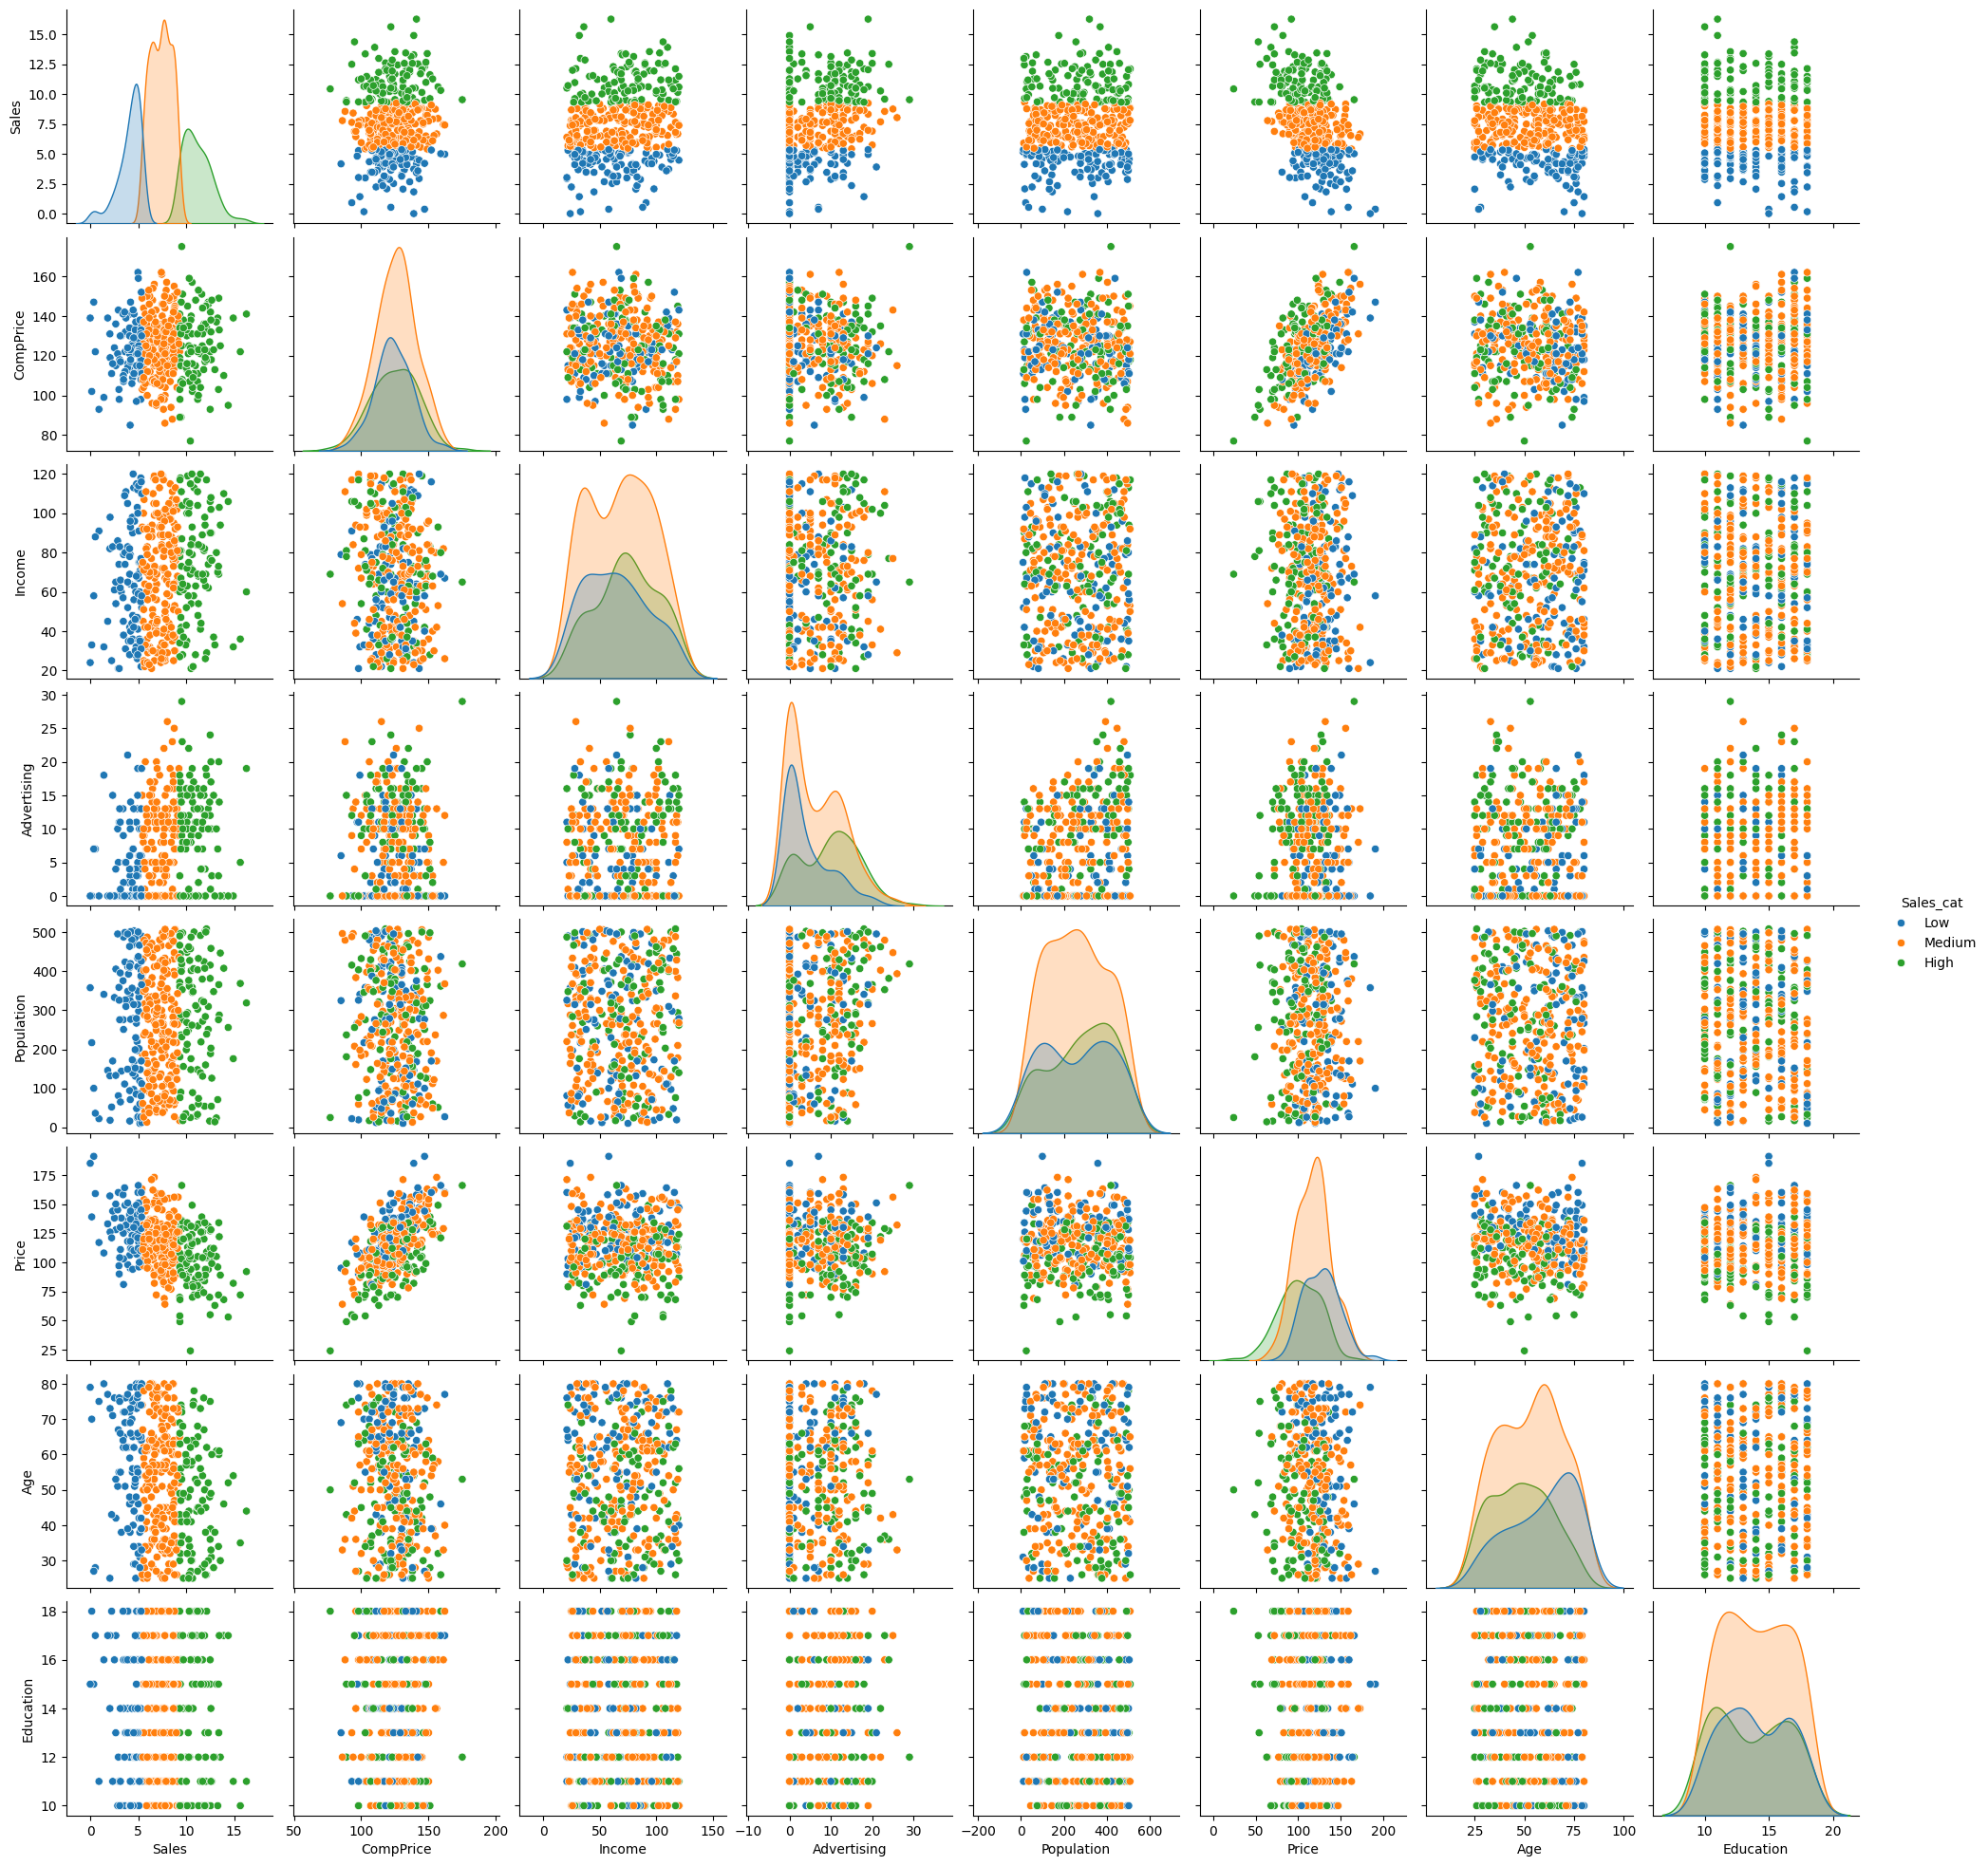

In [20]:
sns.pairplot(data= company_data1, hue = 'Sales_cat')
plt.show()

In [21]:
company_data_dummi = company_data1.copy()
company_data_dummi.drop('Sales',axis=1, inplace =True)
company_data_dummi = pd.get_dummies(company_data_dummi.iloc[:,:-1])
company_data_dummi.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

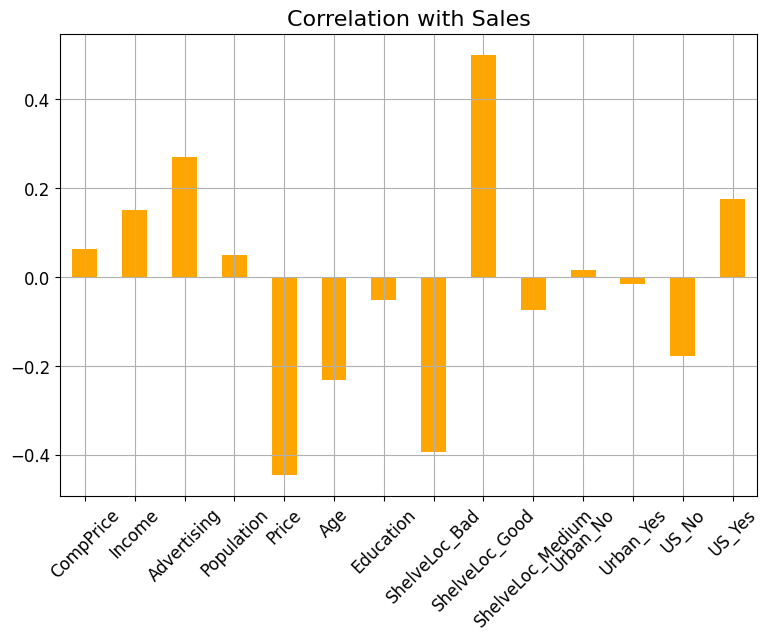

In [22]:
company_data2 = company_data_dummi.copy()

correlations = company_data2.corrwith(company_data1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (9,6), fontsize = 12, color = 'orange', rot = 45, grid = True)
plt.title('Correlation with Sales',fontsize = "16")
plt.show()

### Checking for Imbalanced or balanced dataset with regards to the Target

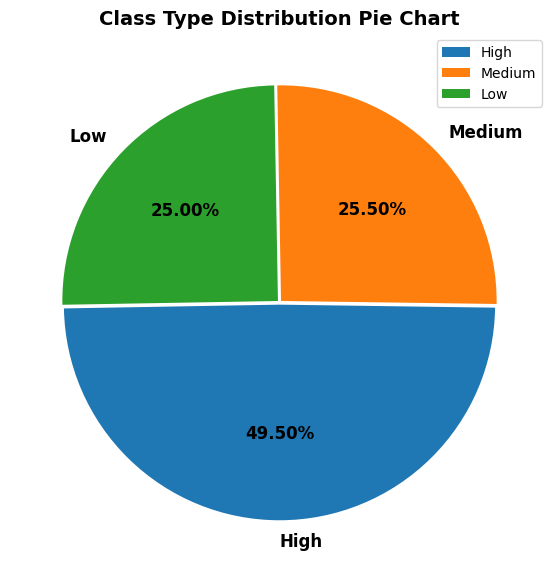

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
plt.pie(company_data1['Sales_cat'].value_counts(), labels=company_data1.Sales_cat.unique(), explode=[0.01, 0.01, 0.01],
        autopct='%.2f%%', startangle=181, textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=14, fontweight='bold')
plt.show()


Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “High” is called the majority class, and the much smaller in size “Low” and “Medium” class is called the minority class.

In [28]:
company_data1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

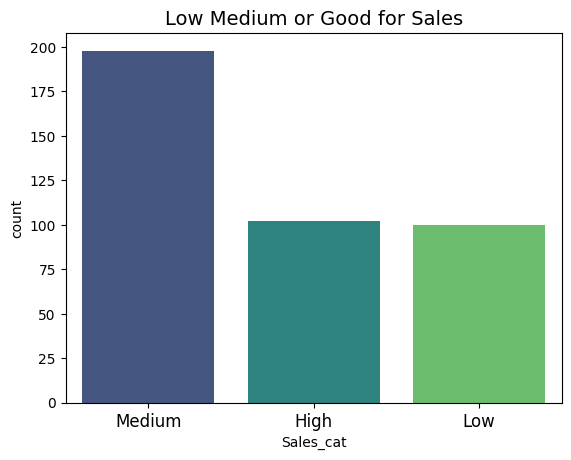

In [29]:
sns.countplot(x= 'Sales_cat', data= company_data1, palette= 'viridis', order= company_data1['Sales_cat'].value_counts().index)
plt.xticks(fontsize= 12)
plt.title('Low Medium or Good for Sales', fontsize= 14)
plt.show()

## 5. Data Pre-Processing

In [30]:
company_data3 = company_data1.copy()
company_data3.drop('Sales',axis=1, inplace =True)
company_data3 = pd.get_dummies(company_data3.iloc[:,:-1])
company_data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [31]:
company_data3['Sales'] = company_data1.Sales_cat
company_data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     Low

### Lable Encoding

In [32]:
le = LabelEncoder()
le.fit(company_data3["Sales"])
company_data3["Sales"]=le.transform(company_data3["Sales"])
company_data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

#### Split into input (x) and output (y) variables

In [33]:
x = company_data3.iloc[:, :-1]
y=  company_data3.Sales

#### Feature extraction

In [34]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

#### Summarize scores

In [35]:
scores = fit.scores_
features = fit.transform(x)

In [36]:
score_company_data = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_company_data.sort_values(by="Score", ascending=False, inplace=True)
score_company_data

Score           Feature
4   300.881058             Price
2   251.767458       Advertising
3   141.113336        Population
5   106.577639               Age
8    66.174919    ShelveLoc_Good
1    65.145403            Income
7    48.524460     ShelveLoc_Bad
12   13.109136             US_No
9     8.654770  ShelveLoc_Medium
13    7.215106            US_Yes
0     2.253637         CompPrice
6     0.689685         Education
10    0.163751          Urban_No
11    0.068520         Urban_Yes

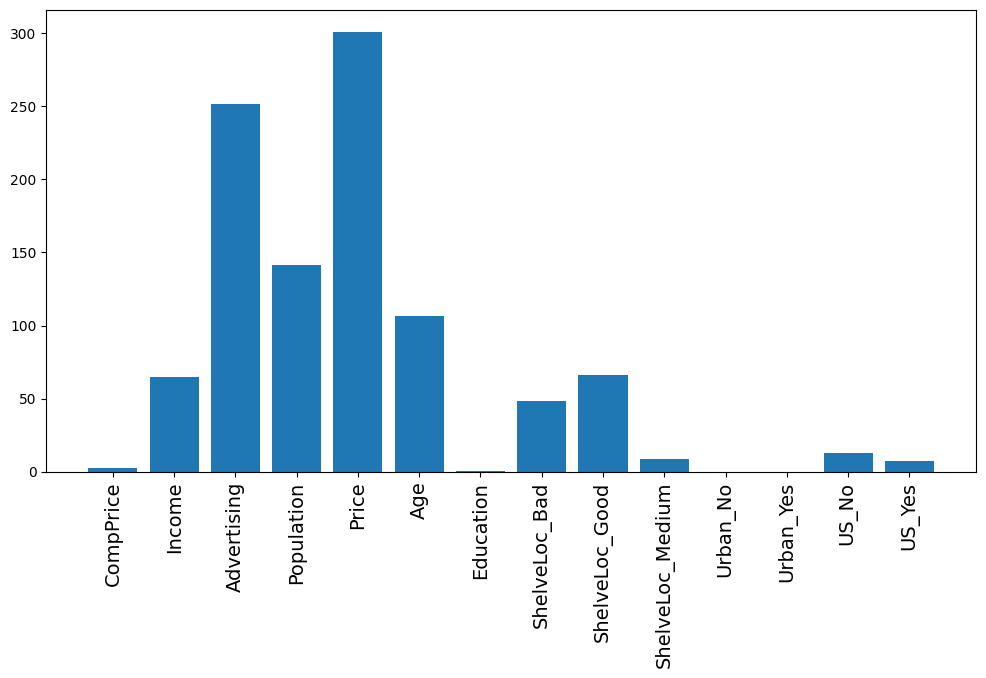

In [37]:
fig, axes = plt.subplots(figsize=(12,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation= 90, size= 14)
plt.show()

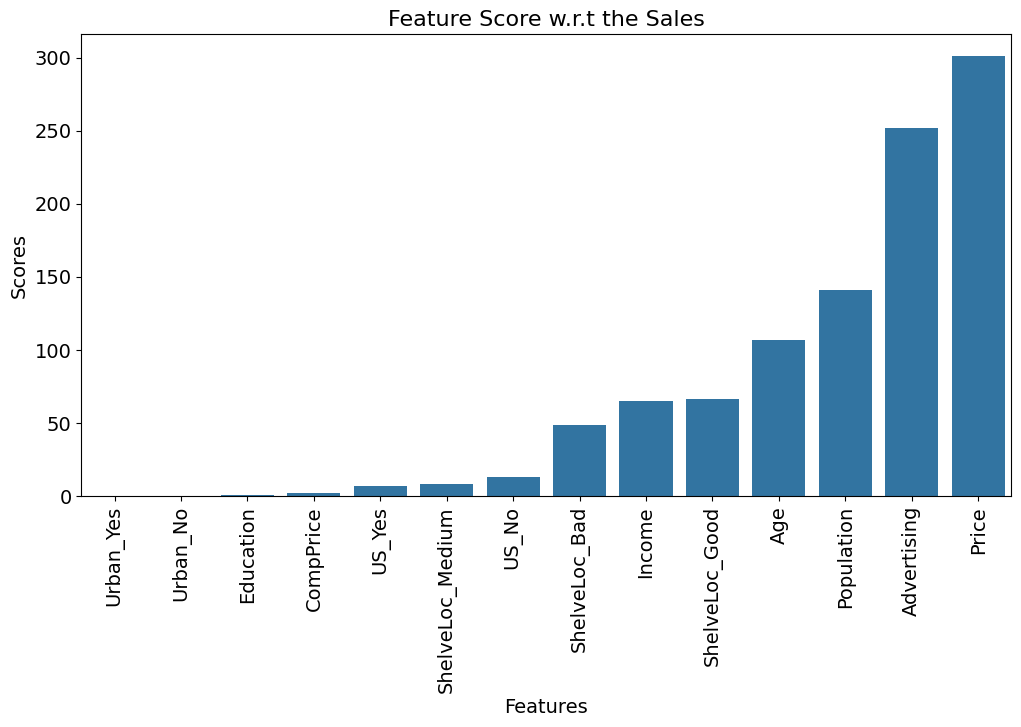

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data= score_company_data, order=score_company_data.sort_values('Score').Feature)
plt.xlabel("Features", size=14)
plt.ylabel("Scores", size=14)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Score w.r.t the Sales", size=16)
plt.show()

In [39]:
model_data = company_data3[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

## 6. Model Building

### StratifiedKFold

In [40]:
x = model_data.drop('Sales',axis=1)
y = model_data[['Sales']]

In [41]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

# summarize train and test composition
    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))

>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40


### Test Train Split With Imbalanced Dataset

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [43]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=320, 1=320, Test: 0=80, 1=80


In [44]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({'Sales': 1}) Testing Data Counter({'Sales': 1})


In [45]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (320, 8)
Shape of x_test  :  (80, 8)
Shape of y_train :  (320, 1)
Shape of y_test  :  (80, 1)


## 7. Model Training And Testing

### Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [46]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [47]:
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":(list(range(1,10))),
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}

tree_clf = DecisionTreeClassifier(random_state=10)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_x, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_x, train_y)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=True)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=False)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 75.83%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.778947   0.766234    0.744681  0.758333    0.763287   
recall      0.804348   0.655556    0.786517  0.758333    0.748807   
f1-score    0.791444   0.706587    0.765027  0.758333    0.754353   
support    92.000000  90.000000  178.000000  0.758333  360.000000   

           weighted avg  
precision      0.758826  
recall         0.758333  
f1-score       0.757168  
support      360.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 74   0  18]
 [  1  59  30]
 [ 20  18 140]]

Test Result:
Accuracy Score: 55.00%
_________________________

#### Get score for different values of n

In [48]:
decision_tree = DecisionTreeClassifier()
skf1 = StratifiedKFold(n_splits=15, shuffle=True, random_state=15)
results = cross_val_score(decision_tree, train_x, train_y, cv=skf1)
print(results.mean())

0.625


In [49]:
params1 = {"criterion":["gini","entropy"],"max_depth":range(1,10),
              "min_samples_split":range(1,10),"min_samples_leaf":range(1,10)}

grid = GridSearchCV(decision_tree, param_grid = params1, cv=skf1, verbose=1, n_jobs=6)
grid.fit(train_x,train_y)
model1 = grid.best_estimator_

Fitting 15 folds for each of 1458 candidates, totalling 21870 fits


In [50]:
grid.best_score_

0.6861111111111111

In [51]:
predict_output1 = model1.predict(test_x)
accuracy_test1 = accuracy_score(test_y,predict_output1)
accuracy_test1

0.625

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.56      0.50      0.53        10
           2       0.62      0.75      0.68        20

    accuracy                           0.62        40
   macro avg       0.63      0.58      0.60        40
weighted avg       0.63      0.62      0.62        40



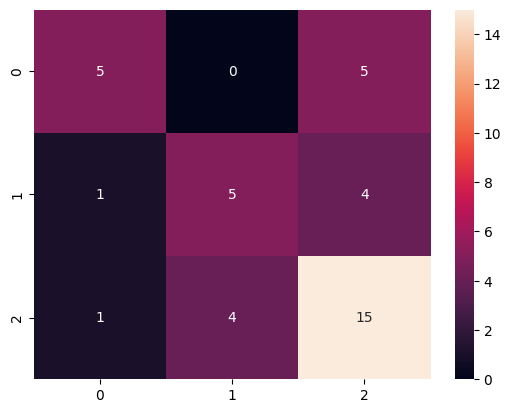

In [52]:
sns.heatmap(confusion_matrix(test_y, predict_output1),annot=True)
print(classification_report(test_y,predict_output1))

### Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [53]:
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":(list(range(1,10))),
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}

tree_clf = DecisionTreeClassifier(random_state= 12)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 64.38%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.766667   0.611940    0.616580   0.64375    0.665062   
recall      0.560976   0.512500    0.753165   0.64375    0.608880   
f1-score    0.647887   0.557823    0.678063   0.64375    0.627924   
support    82.000000  80.000000  158.000000   0.64375  320.000000   

           weighted avg  
precision       0.65388  
recall          0.64375  
f1-score        0.64027  
support       320.00000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 46   1  35]
 [  0  41  39]
 [ 14  25 119]]

Test Result:
Accuracy Score: 66.25%
____________________

#### Get score for different values of n

In [54]:
decision_tree = DecisionTreeClassifier()
skf2 = StratifiedKFold(n_splits=15, shuffle=True, random_state=20)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf2)
print(results.mean())

0.5813852813852814


In [55]:
params2 = {"criterion":["gini","entropy"], "max_depth":range(1,10),
              "min_samples_split":range(1,10), "min_samples_leaf":range(1,10)}

grid = GridSearchCV(decision_tree, param_grid= params2, cv=skf2, verbose=1, n_jobs=6)
grid.fit(x_train,y_train)
model2 = grid.best_estimator_

Fitting 15 folds for each of 1458 candidates, totalling 21870 fits


In [56]:
grid.best_score_

0.6776334776334776

In [57]:
predict_output2 = model2.predict(x_test)
accuracy_test2 = accuracy_score(y_test,predict_output2)
accuracy_test2

0.6

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        20
           1       0.56      0.45      0.50        20
           2       0.64      0.57      0.61        40

    accuracy                           0.60        80
   macro avg       0.59      0.61      0.59        80
weighted avg       0.60      0.60      0.59        80



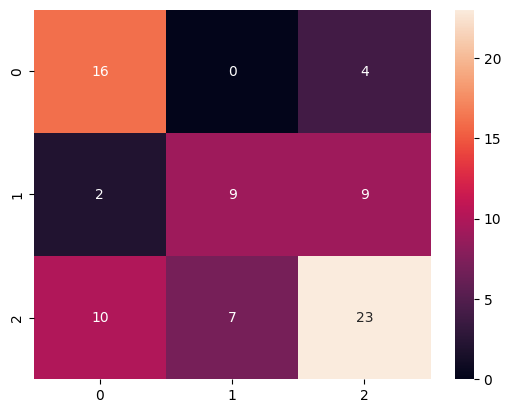

In [58]:
sns.heatmap(confusion_matrix(y_test, predict_output2),annot=True)
print(classification_report(y_test,predict_output2))

#### Observation:
* In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

## 8. Pruning

In [59]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), "max_depth":(list(range(1,10))),
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}


tree_clf = DecisionTreeClassifier(random_state= 21)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 81.56%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.807229   0.814815    0.820513  0.815625    0.814186   
recall      0.817073   0.825000    0.810127  0.815625    0.817400   
f1-score    0.812121   0.819876    0.815287  0.815625    0.815761   
support    82.000000  80.000000  158.000000  0.815625  320.000000   

           weighted avg  
precision      0.815684  
recall         0.815625  
f1-score       0.815623  
support      320.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 67   1  14]
 [  0  66  14]
 [ 16  14 128]]

Test Result:
Accuracy Score: 66.25%
_____________________

#### This is a balanced state of training and testing accuracy are close to each other where there is no overfitting or underfitting yet we can do better than this, let's try post pruning technique using Alpha Values

In [60]:
clf = DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6)

In [61]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

In [62]:
print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.822
Testing Accuracy  : 0.65


### Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning

In [63]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state= 13)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=13)

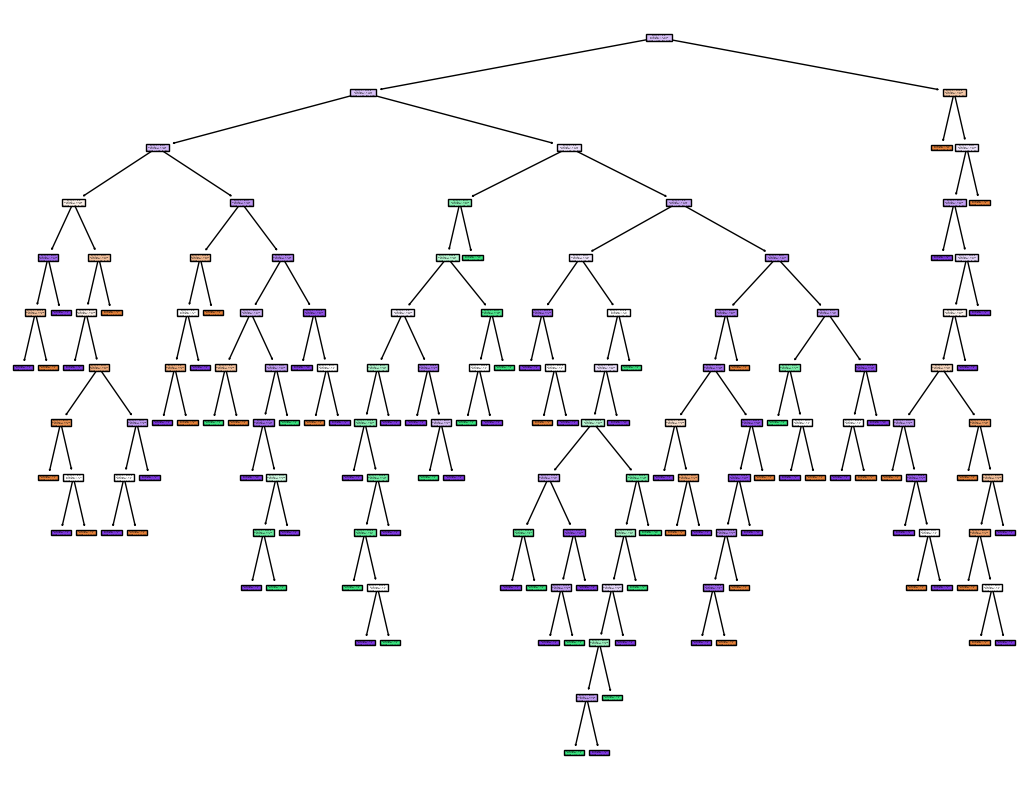

In [64]:
plt.figure(figsize=(13,10))
tree.plot_tree(model_entropy,filled=True)
plt.show()

#### Predicting on test data

In [65]:
preds = model_entropy.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

2    46
0    20
1    14
dtype: int64

#### Classification Report

In [66]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.57      0.40      0.47        20
           2       0.65      0.75      0.70        40

    accuracy                           0.66        80
   macro avg       0.66      0.63      0.64        80
weighted avg       0.66      0.66      0.65        80



In [67]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [68]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=10, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.17009894607233478


#### Accuracy vs alpha for training and testing sets

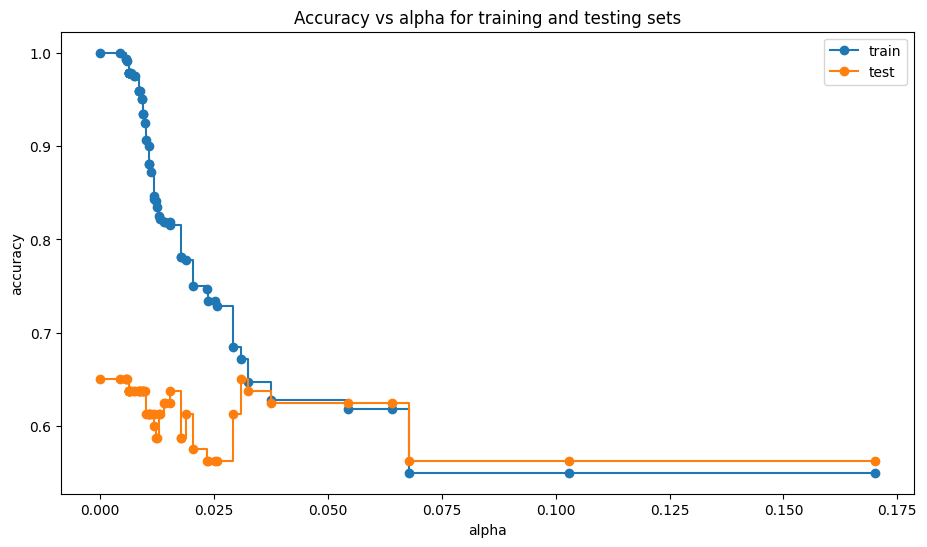

In [69]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other

In [70]:
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=122, ccp_alpha= 0.170098)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.170098, criterion='entropy',
                       random_state=122)

In [71]:
pred_train1 = clf1.predict(x_train)
pred_test1 = clf1.predict(x_test)
print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3),'\n'
      'Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.822 
Testing Accuracy  : 0.65


              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.00      0.00      0.00        20
           2       0.56      0.82      0.67        40

    accuracy                           0.56        80
   macro avg       0.38      0.47      0.42        80
weighted avg       0.42      0.56      0.48        80



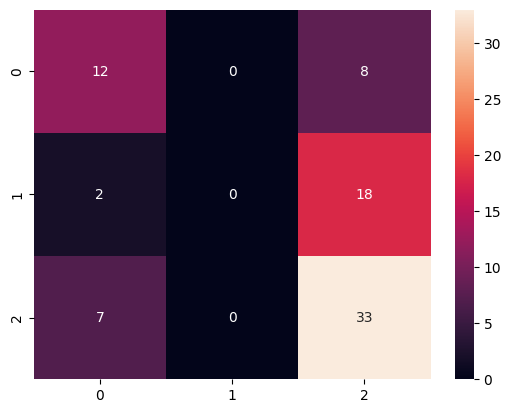

In [72]:
sns.heatmap(confusion_matrix(y_test, pred_test1),annot=True)
print(classification_report(y_test,pred_test1))

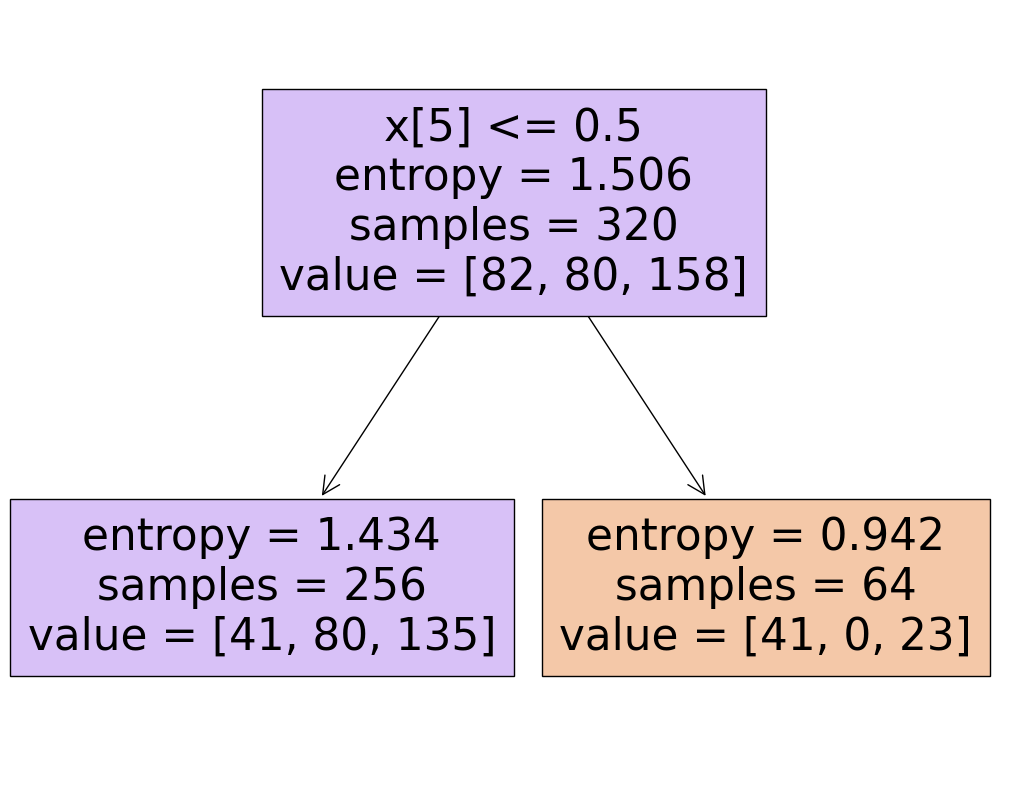

In [73]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf1,filled=True)
plt.show()

### Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning

In [74]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=11)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

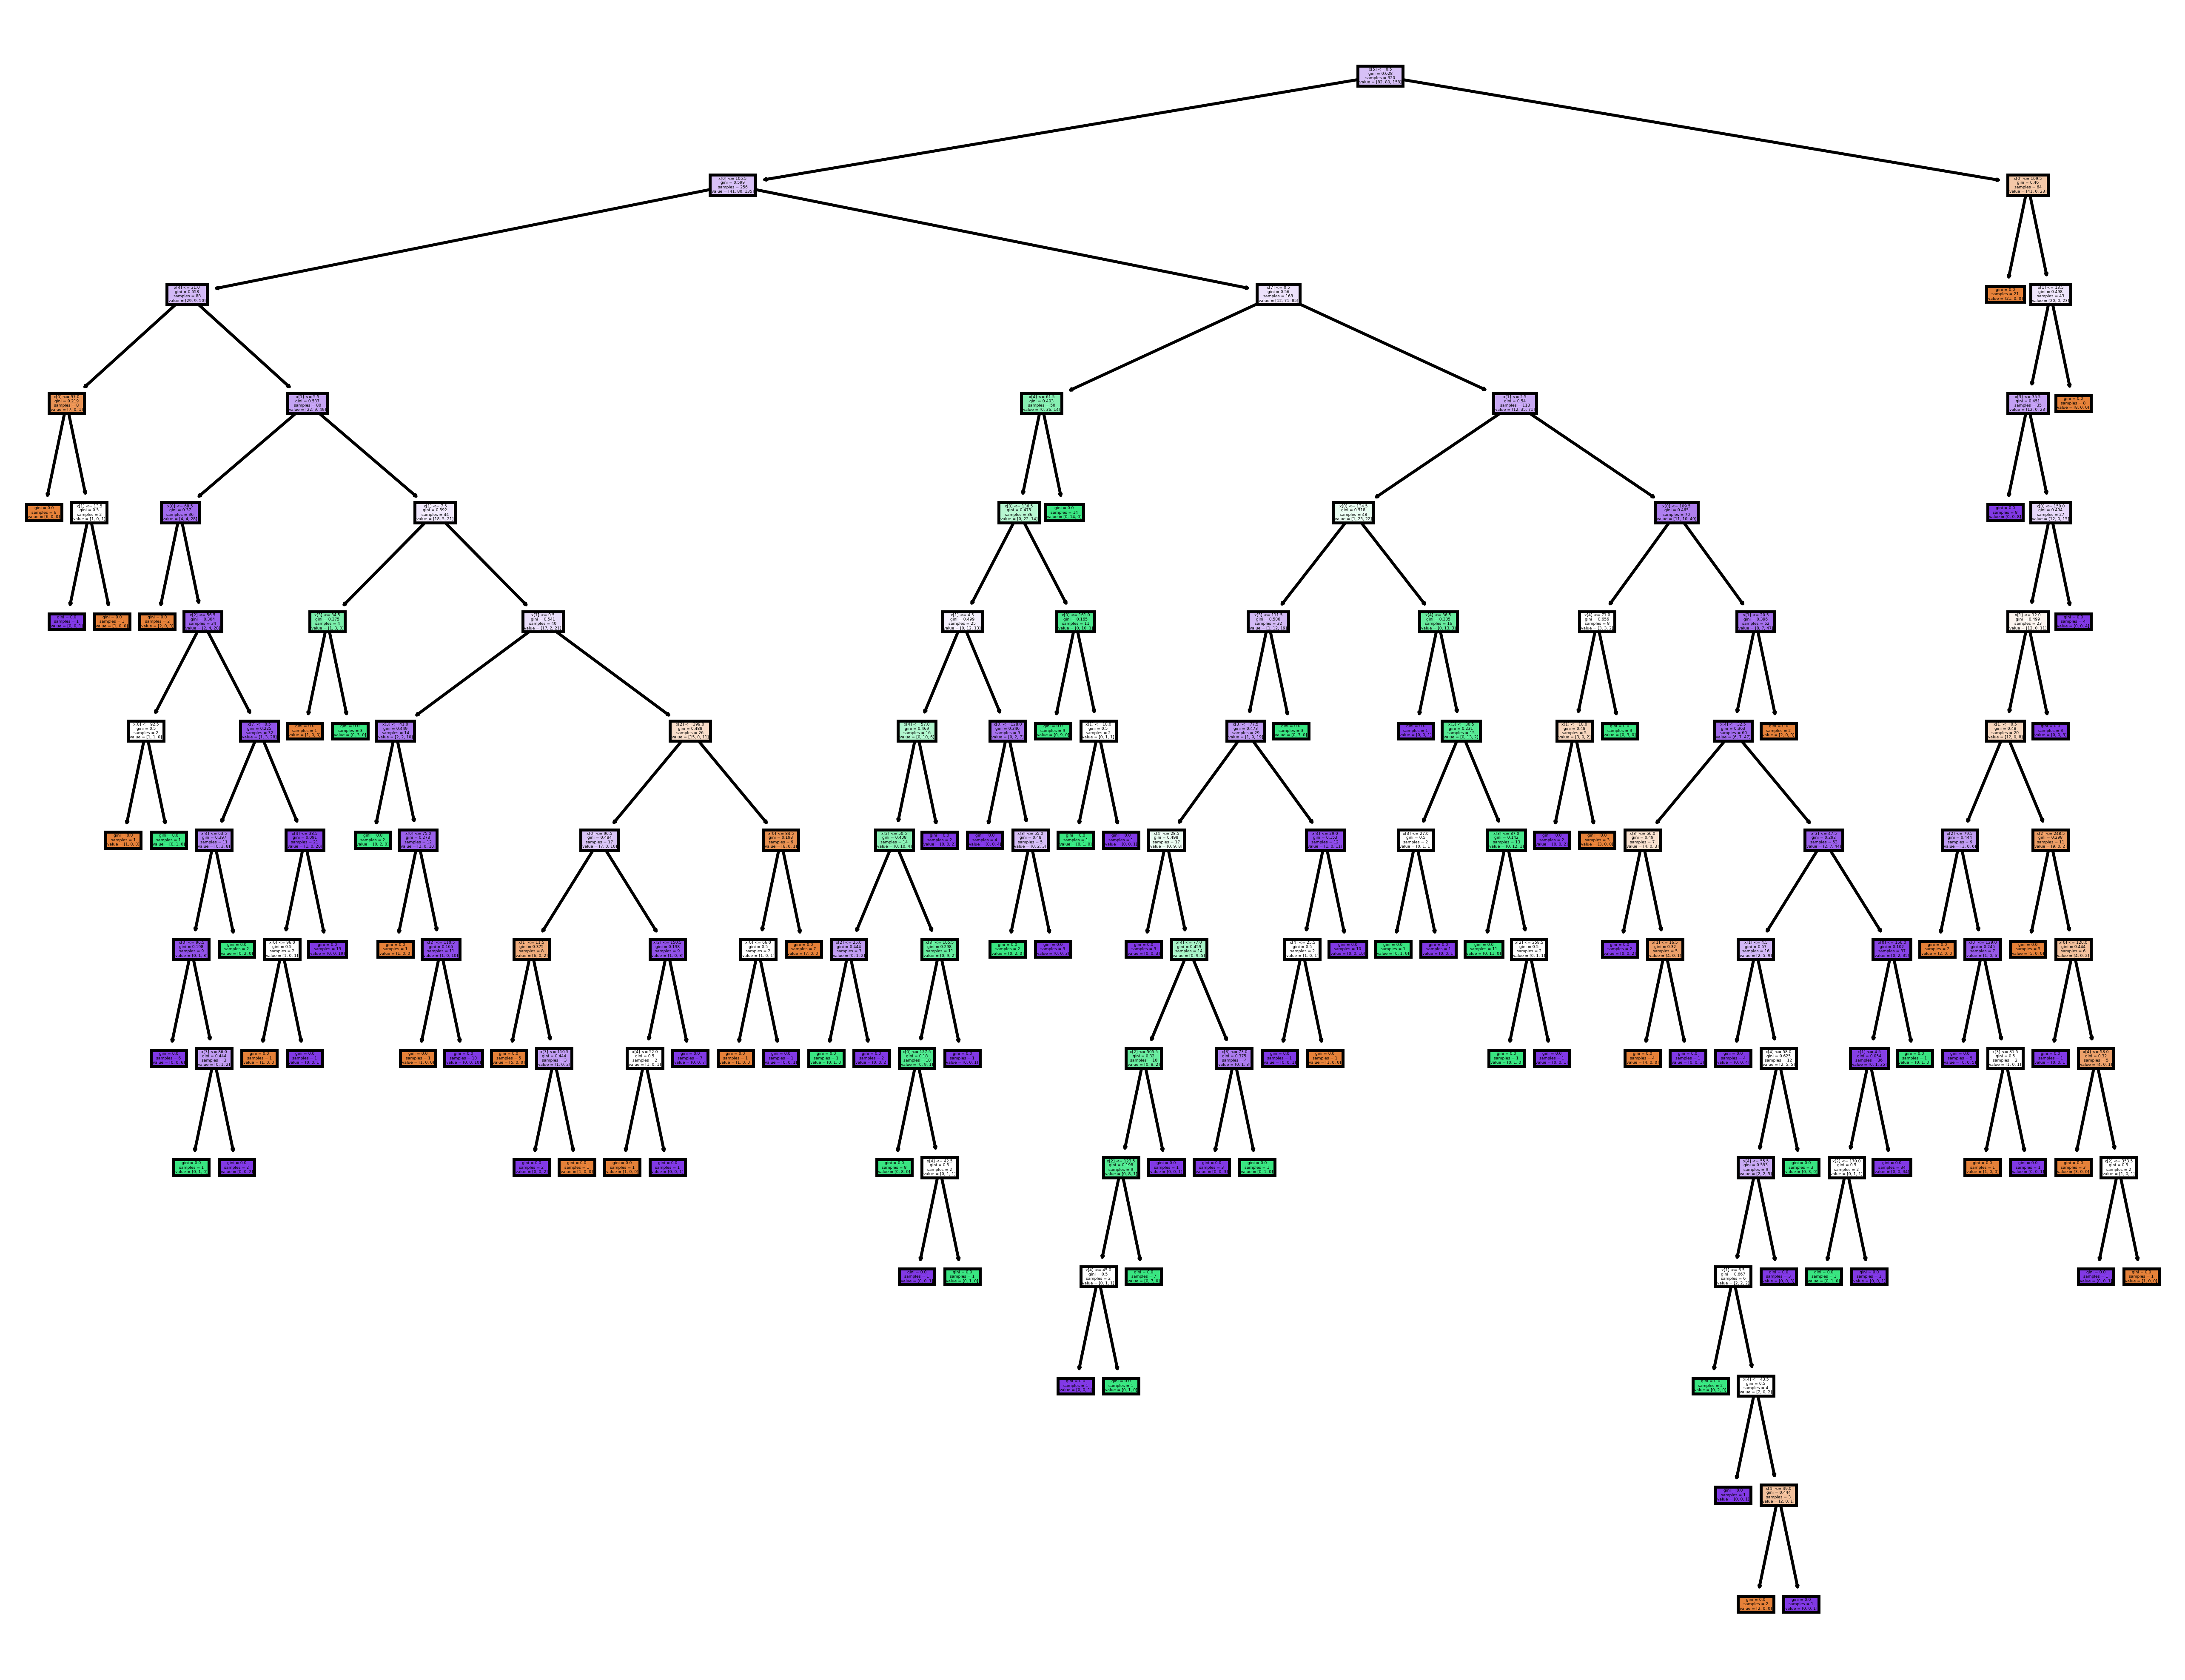

In [75]:
plt.figure(figsize=(13,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

#### Predicting on test data

In [76]:
preds = model_gini.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

2    44
0    20
1    16
dtype: int64

#### Classification Report

In [77]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.56      0.45      0.50        20
           2       0.64      0.70      0.67        40

    accuracy                           0.64        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63      0.64      0.63        80



In [78]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [79]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=20, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05707519531250005


### Accuracy vs alpha for training and testing sets

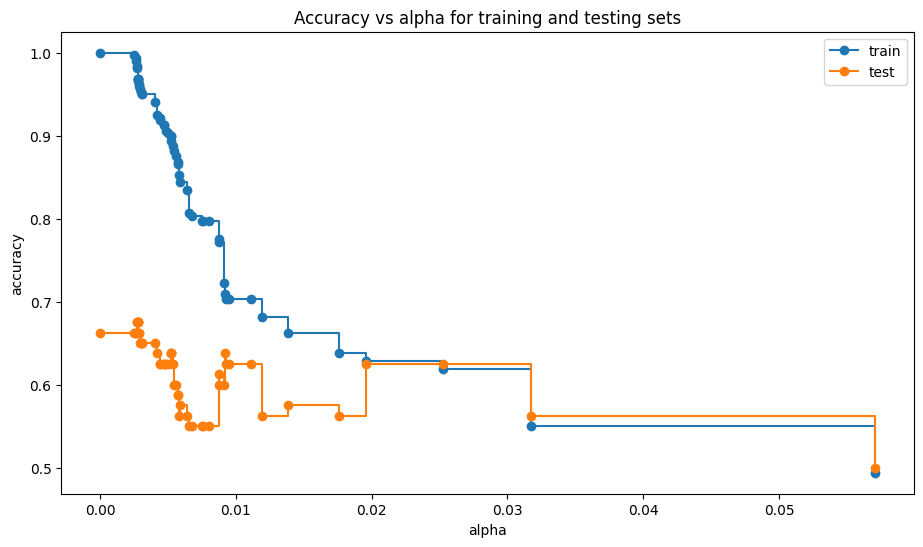

In [80]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other

In [81]:
clf2 = DecisionTreeClassifier(criterion='gini',random_state=125, ccp_alpha= 0.057075)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.057075, random_state=125)

In [82]:
pred_train2 = clf2.predict(x_train)
pred_test2 = clf2.predict(x_test)

print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3),'\n'
      'Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.822 
Testing Accuracy  : 0.65


              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.00      0.00      0.00        20
           2       0.56      0.82      0.67        40

    accuracy                           0.56        80
   macro avg       0.38      0.47      0.42        80
weighted avg       0.42      0.56      0.48        80



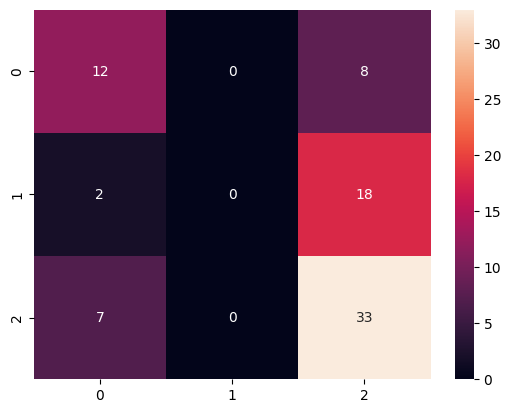

In [83]:
sns.heatmap(confusion_matrix(y_test, pred_test2),annot=True)
print(classification_report(y_test,pred_test2))

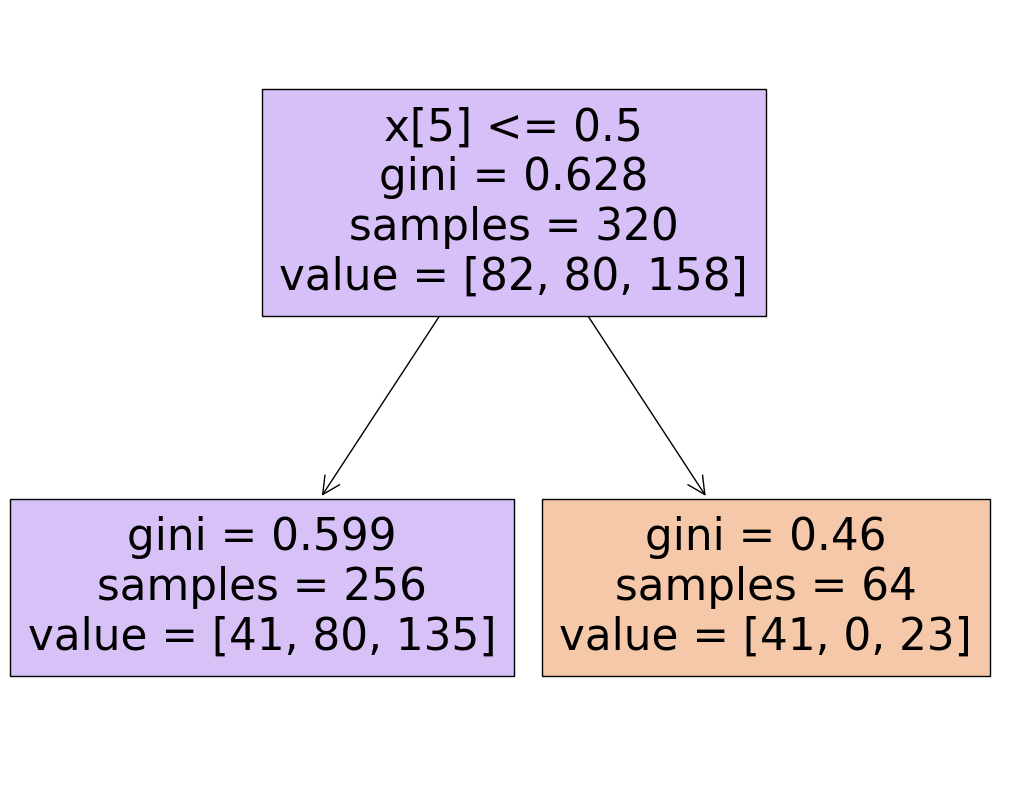

In [84]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf2,filled=True)
plt.show()

## 9. Model Evaluation

#### Using best paramters: 'criterion': 'entropy',  'max_depth': 8 (GridSearchCV)

In [85]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test) * 100:.2f}%")

Training Accuracy: 82.19%
Testing Accuracy : 65.00%


#### Using Entropy Criteria with Alpha values

In [86]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train1) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test1) * 100:.2f}%")

Training Accuracy: 55.00%
Testing Accuracy : 56.25%


#### Using Gini Criteria with Alpha values

In [87]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train2) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test2) * 100:.2f}%")

Training Accuracy: 55.00%
Testing Accuracy : 56.25%


## 10. Model Deployement

In [88]:
from pickle import dump

In [89]:
dump(tree_clf,open('company_data_intell.pkl','wb'))

# The End !!!